Epoch 1/3
391/391 [==============================] - 4s 8ms/step - loss: 1.9665 - accuracy: 0.2958 - val_loss: 1.8307 - val_accuracy: 0.3485
Epoch 2/3
391/391 [==============================] - 2s 6ms/step - loss: 1.7785 - accuracy: 0.3676 - val_loss: 1.7260 - val_accuracy: 0.3944
Epoch 3/3
391/391 [==============================] - 2s 6ms/step - loss: 1.7177 - accuracy: 0.3899 - val_loss: 1.6802 - val_accuracy: 0.4042


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


<Figure size 576x288 with 0 Axes>

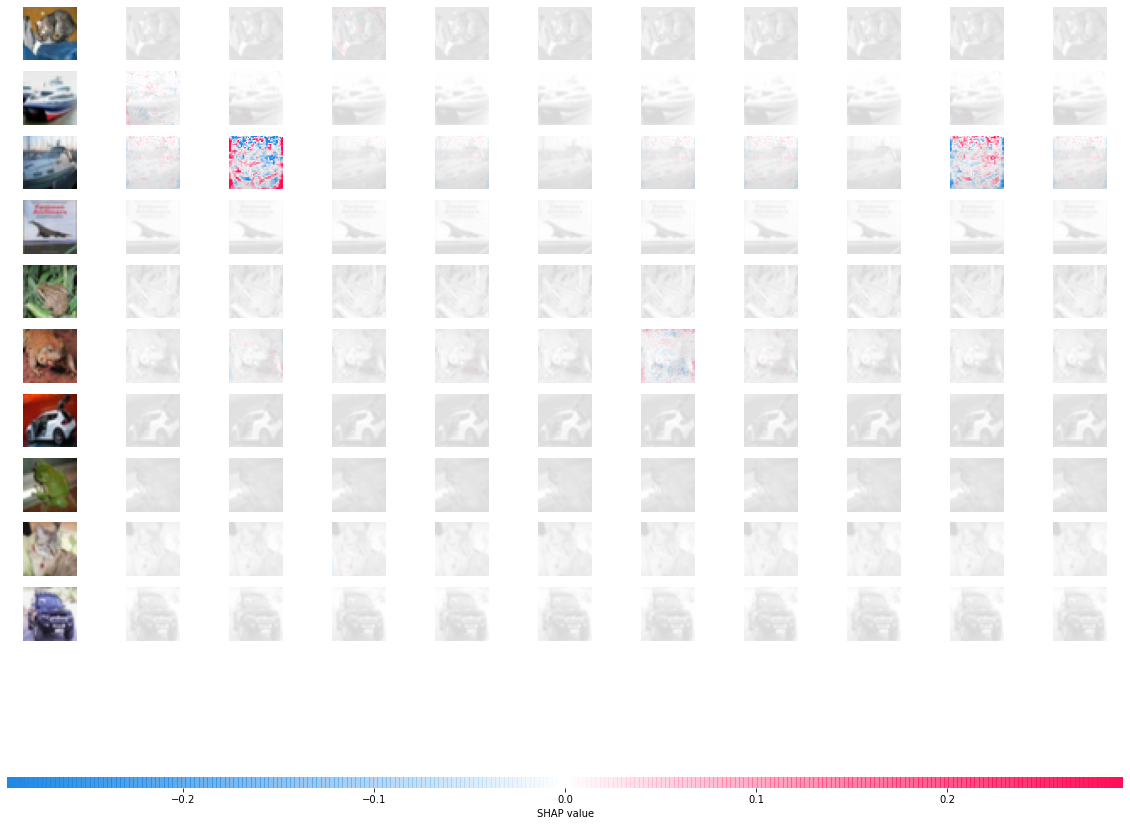

In [3]:
import shap
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

model = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=128, validation_data=(x_test, y_test))

background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

explainer = shap.DeepExplainer(model, background)

X_test_sample = x_test[:10]

shap_values = explainer.shap_values(X_test_sample)

plt.figure(figsize=(8, 4))
shap.image_plot(shap_values, X_test_sample)
